In [6]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.aer import noise

%matplotlib inline

In [7]:
secret_number = '101101'
secret_length = len(secret_number)
secret_range = range(secret_length)

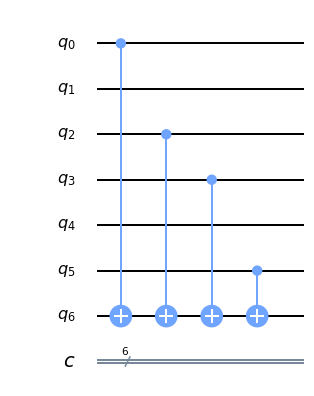

In [8]:
bb = QuantumCircuit(secret_length + 1, secret_length)
for ii, yesno in enumerate(reversed(secret_number)):
    if yesno == '1':
        bb.cx(ii, secret_length)

bb.draw(output='mpl')

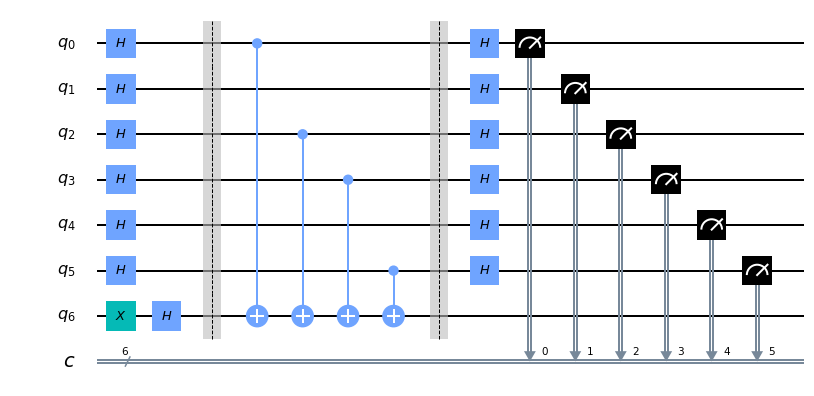

In [9]:
circuit = QuantumCircuit(secret_length + 1, secret_length)
circuit.h(secret_range)
circuit.x(secret_length)
circuit.h(secret_length)

circuit.barrier()
circuit +=bb
circuit.barrier()

circuit.h(secret_range)
circuit.measure(secret_range, secret_range)

circuit.draw(output='mpl')

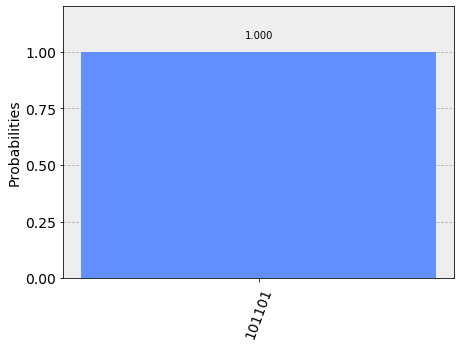

In [10]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator).result()
counts = result.get_counts()
plot_histogram(result.get_counts(circuit))

In [ ]:
noise_model
result = execute(circuit, backend = simulator).result()
counts = result.get_counts()
plot_histogram(result.get_counts(circuit))